In [ ]:
import os, sys, re
from tqdm import tqdm
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

current_dir = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.dirname(current_dir)

In [ ]:
database_path = os.path.join(project_root, "databases", "sber_posts_2023.db")
conn = sqlite3.connect(database_path)
sber_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts_sber", conn)

database_path = os.path.join(project_root, "databases", "sgzh_posts_2023.db")
conn = sqlite3.connect(database_path)
sgzh_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

database_path = os.path.join(project_root, "databases", "mtlr_posts_2023.db")
conn = sqlite3.connect(database_path)
mtlr_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

database_path = os.path.join(project_root, "databases", "lkoh_posts_2023.db")
conn = sqlite3.connect(database_path)
lkoh_posts_2023 = pd.read_sql_query("SELECT * FROM tcs_pulse_posts", conn)

---

In [6]:
sber_posts_2023["date"] = pd.to_datetime(sber_posts_2023["inserted"].str[:10])
daily_counts_sber = sber_posts_2023.groupby("date").size().reset_index(name="count")

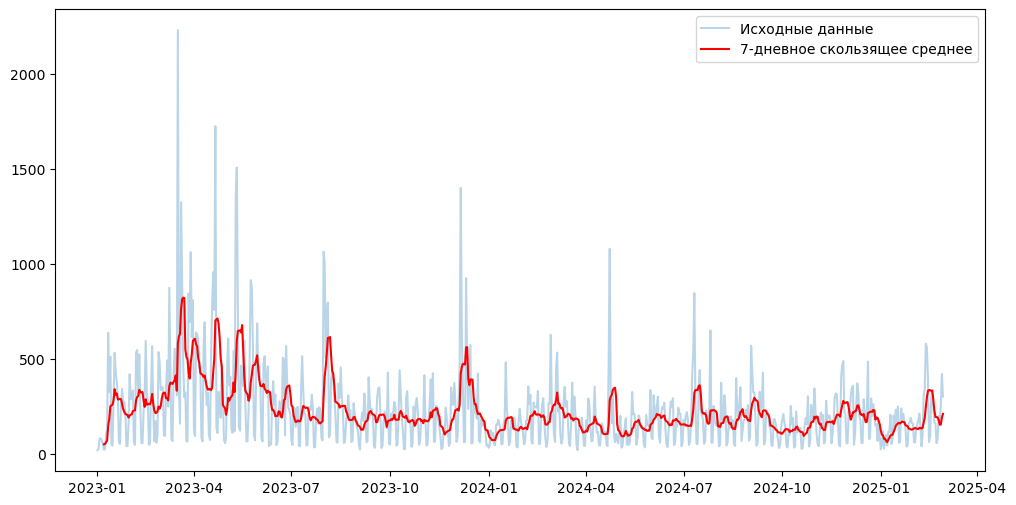

In [9]:
dates = daily_counts_sber['date']
counts = daily_counts_sber['count']

rolling_mean = counts.rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(dates, counts, alpha=0.3, label='Исходные данные')
plt.plot(dates, rolling_mean, color='red', label='7-дневное скользящее среднее')
plt.legend()

Text(0.5, 1.0, 'Остатки')

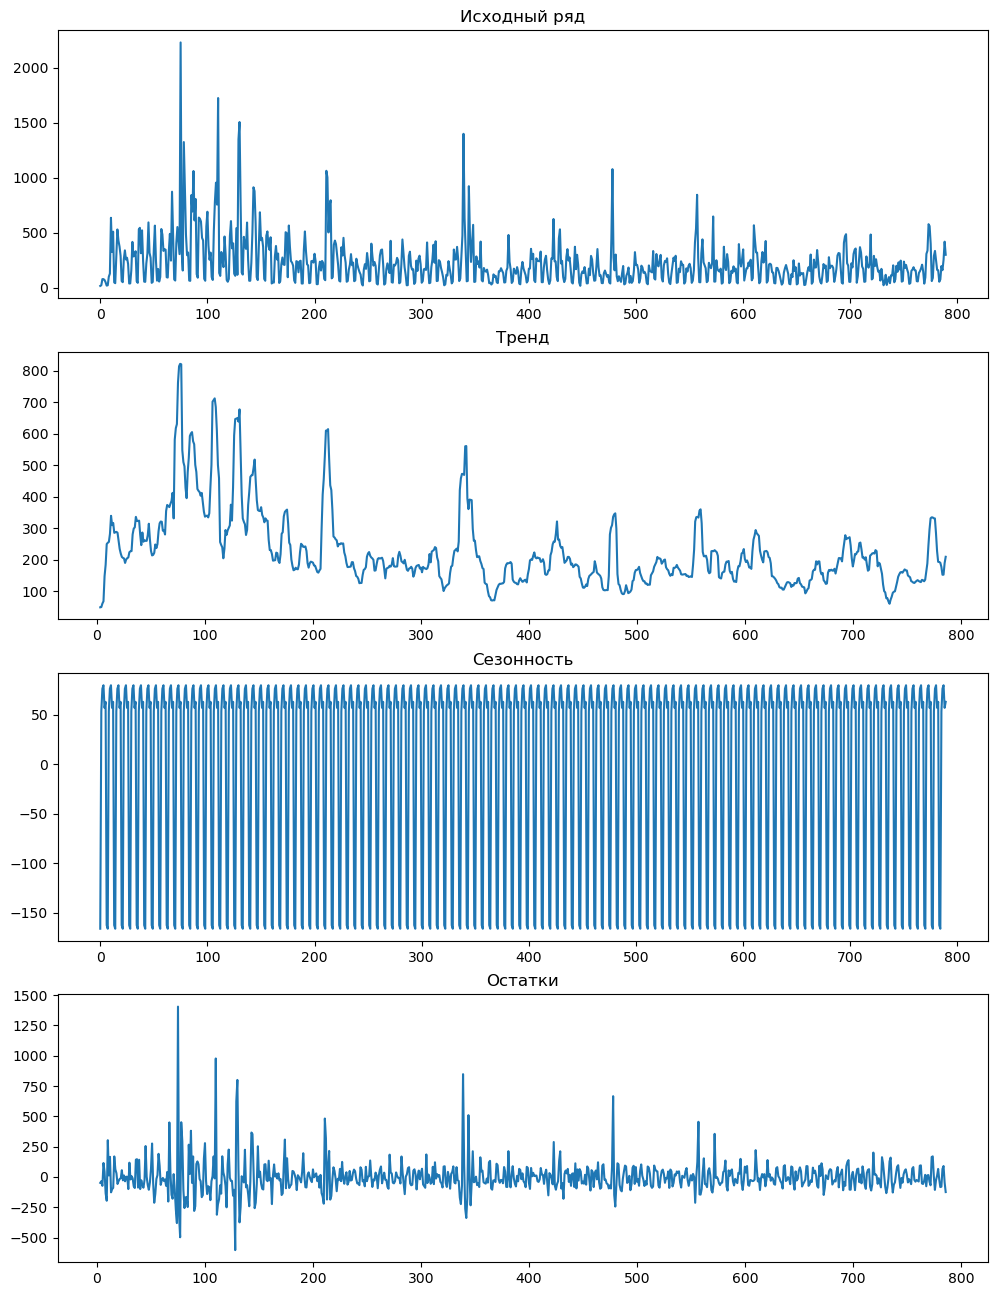

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(counts, period=7)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Исходный ряд')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Тренд')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Сезонность')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Остатки')

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18972\2277342073.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.80, 1])


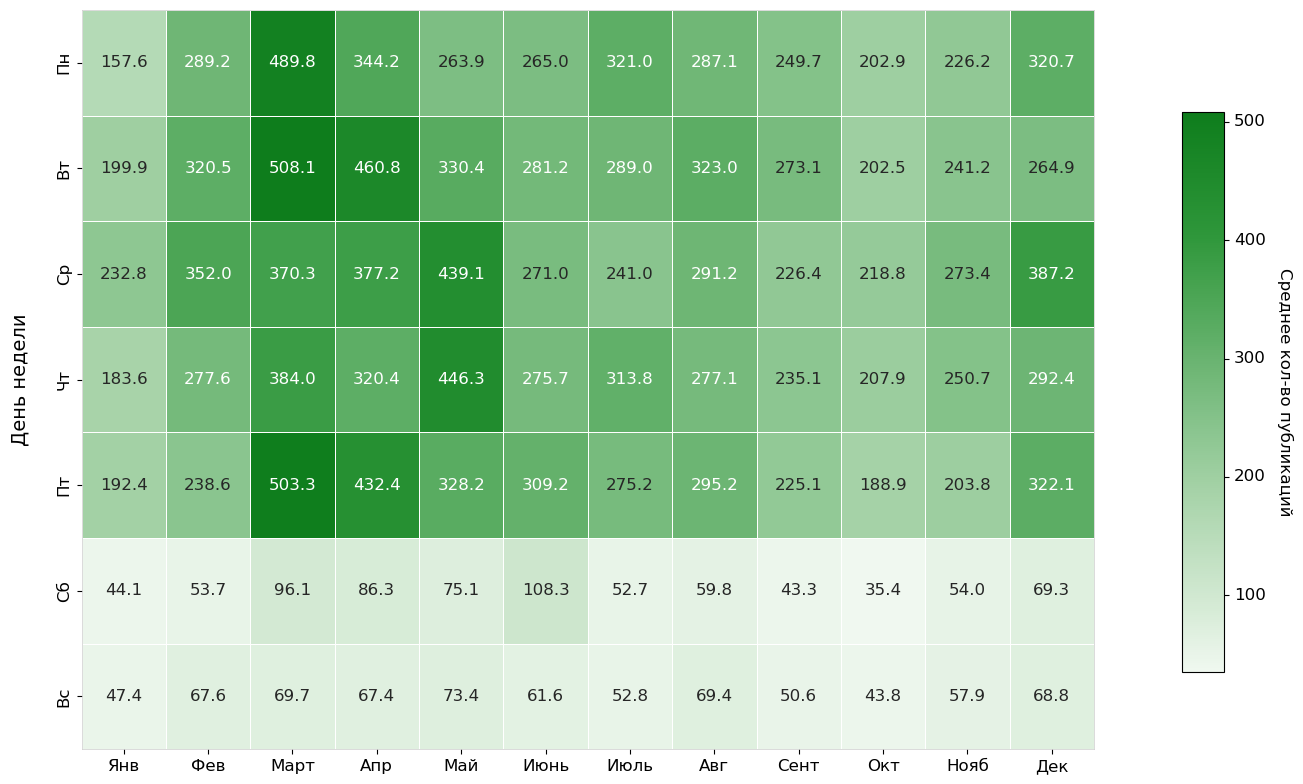

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Создаем фигуру с определенными размерами
fig, ax = plt.subplots(figsize=(14, 8))

# Корпоративные зеленые цвета Сбербанка
# От светлого к темному
sber_colors = [
    "#f0f8f0",  # Очень светлый зеленый
    "#d6ebd6",  # Светло-зеленый
    "#bddebe",  # Светло-зеленый
    "#a3d1a5",  # Зеленый средней яркости
    "#87c38c",  # Зеленый средний
    "#6ab471",  # Фирменный зеленый
    "#4da656",  # Зеленый насыщенный
    "#2f973b",  # Темно-зеленый
    "#1e8a2b",  # Темно-зеленый
    "#0e7d1c",
]  # Глубокий зеленый (близко к основному корпоративному)

# Создаем собственную цветовую карту
sber_cmap = LinearSegmentedColormap.from_list("sber_green", sber_colors)

# Рисуем тепловую карту
h = sns.heatmap(
    heatmap_data,
    cmap=sber_cmap,  # Используем корпоративную палитру
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar=False,
    ax=ax,
)

# Выделяем больше места справа
plt.subplots_adjust(right=0.80)

# Создаем отдельные оси для цветовой шкалы
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])

# Добавляем цветовую шкалу на созданные оси
cbar = fig.colorbar(h.collections[0], cax=cbar_ax)
cbar.set_label("Среднее кол-во публикаций", rotation=270, labelpad=20)

# Настройка заголовков и меток
# plt.title('Активность публикаций по дням недели и месяцам', fontsize=16, pad=20)
plt.xlabel("Месяц", fontsize=14, labelpad=10)
ax.set_ylabel("День недели", fontsize=14, labelpad=20)

# Настройка меток осей
plt.xticks(rotation=0, ha="center")
plt.yticks(rotation=0, va="center")

# Настройка рамки
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.5)
    spine.set_color("#cccccc")

# Применяем tight_layout только к основной области графика
plt.tight_layout(rect=[0, 0, 0.80, 1])

plt.show()

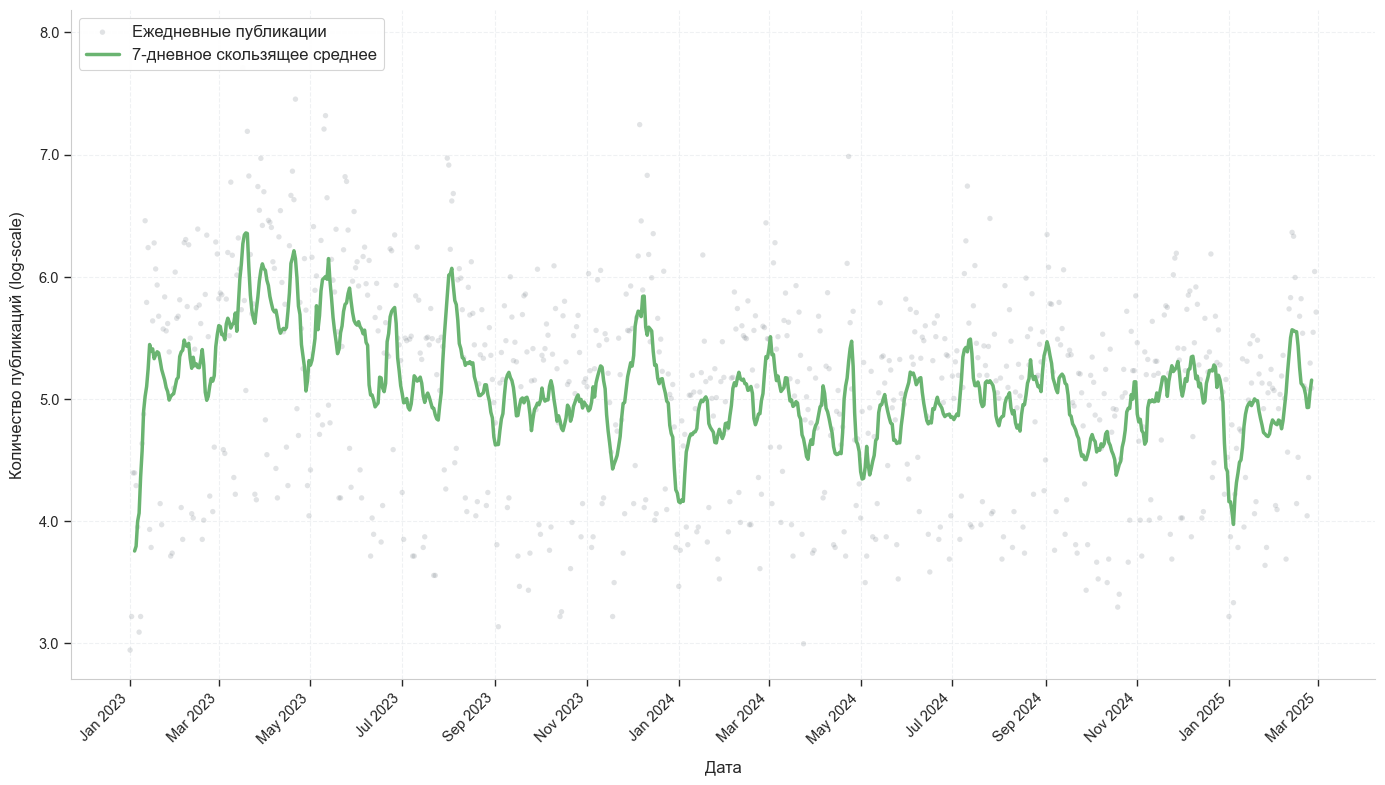

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Устанавливаем стиль для качественной визуализации
plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.2)

# Предполагаем, что основной DataFrame с данными называется df
# и содержит столбцы index (даты) и 'counts' (количество публикаций)

# Копируем исходный датафрейм для преобразований
df_log = df.copy()

# Применяем логарифмическое преобразование к данным
df_log['count_log'] = np.log1p(df_log['count'])

# Рассчитываем скользящее среднее с разными окнами
df_log['rolling_7d'] = df_log['count_log'].rolling(window=7, center=True).mean()
df_log['rolling_30d'] = df_log['count_log'].rolling(window=30, center=True).mean()

# Создаем график
fig, ax = plt.subplots(figsize=(14, 8))

# Определяем корпоративные цвета Сбербанка
sber_green = "#1e8a2b"  # Основной зеленый
sber_light_green = "#6ab471"  # Светло-зеленый
gray_color = "#6c757d"  # Серый для точек
grid_color = "#e9ecef"  # Цвет сетки

# Рисуем точки исходных данных (полупрозрачные)
scatter = ax.scatter(df_log.index, df_log['count_log'], 
                    alpha=0.2, s=15, color=gray_color, 
                    edgecolor='none', label='Ежедневные публикации')

# Линии скользящих средних
line1 = ax.plot(df_log.index, df_log['rolling_7d'], 
               linewidth=2.5, color=sber_light_green, 
               label='7-дневное скользящее среднее')

# line2 = ax.plot(df_log.index, df_log['rolling_30d'], 
#                linewidth=3.5, color=sber_green, 
#                label='30-дневное скользящее среднее')

# Функция форматирования значений оси Y
def y_fmt(y, pos):
    # Преобразуем логарифмические значения обратно для отображения
    # return f'{int(np.expm1(y)):,}'.replace(',', ' ')
    return y

# Настройка осей и сетки
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Подпись каждые 2 месяца
ax.grid(True, linestyle='--', alpha=0.7, color=grid_color)

# Автоформатирование дат для предотвращения наложения
fig.autofmt_xdate(rotation=45)

# Настройка заголовков и подписей
# ax.set_title('Динамика публикаций в T-pulse: логарифмическая шкала', 
#            fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Дата', fontsize=12, labelpad=10)
ax.set_ylabel('Количество публикаций (log-scale)', fontsize=12, labelpad=10)

# Настройка легенды
legend = ax.legend(loc='upper left', frameon=True, fontsize=12, 
                  framealpha=0.95, edgecolor='lightgrey')
legend.get_frame().set_linewidth(0.8)

# Добавляем пояснение о логарифмической шкале
# footnote = ax.annotate('Примечание: данные представлены в логарифмической шкале для лучшей визуализации трендов',
#                      xy=(0.5, -0.12), xycoords='axes fraction', ha='center',
#                      fontsize=11, fontstyle='italic', color='#555555')

# Настройка внешнего вида графика
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Добавляем небольшие отступы вокруг данных
# Определяем минимальное и максимальное значения для оси Y
y_min = df_log['count_log'].min()
y_max = df_log['count_log'].max()
y_range = y_max - y_min
ax.set_ylim([y_min - 0.05 * y_range, y_max + 0.1 * y_range])

# Финальные настройки и сохранение
plt.tight_layout()
plt.savefig('sber_publications_log_scale.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
top_dates = df.sort_values(by='count', ascending=False).head(5)
top_dates

,count,month,day_of_week
date,,,
2023-03-17,2230,3,4
2023-04-21,1725,4,4
2023-05-11,1507,5,3
2023-12-06,1400,12,2
2023-05-10,1350,5,2


In [49]:
sber_posts_2023[sber_posts_2023['date'] == '2023-03-17']['content'].head(200).values

array(['{$SBER}🚀',
       'Друзья, давайте немного поговорим о шортах. Вижу много дискуссий по этому поводу в пульсе.\n\nОпишу, как делать не надо для начала:\n🔴идти против глобального тренда(это правило номер 1)\n🔴заходить без стопов перед отчетностью(а вдруг она лучше/хуже ваших и общих ожиданий)\n🔴идти против компании, которая есть в индексе, когда индекс растет(индекс вытянет акцию)\n🔴ставить короткие стопы на открытии рынка(часто на открытии собирают ликвидность, потом цена возвращается к исходным, и начинается обычная торговля, поэтому, если наблюдать за поведением акций часто можно увидеть на 5-минутках большие хвосты свечей вниз/вверх)\n🔴не надо заходить без конкретной цели(тейка). Лучше зафиксируйте, оцените заново ситуацию и перезайдите, чем пожадничаете и вообще закроетесь в минус.\n🔴не гадайте. Есть новости, есть ТА. Если по ТА видно сигнал, заходите в сделку. Если нет, не надо! Тем более на позитивных новостях. Это я про {$SBER}\n\nТеперь опишу, что может помочь успешно за

In [51]:
# %pip install wordcloud pymystem3

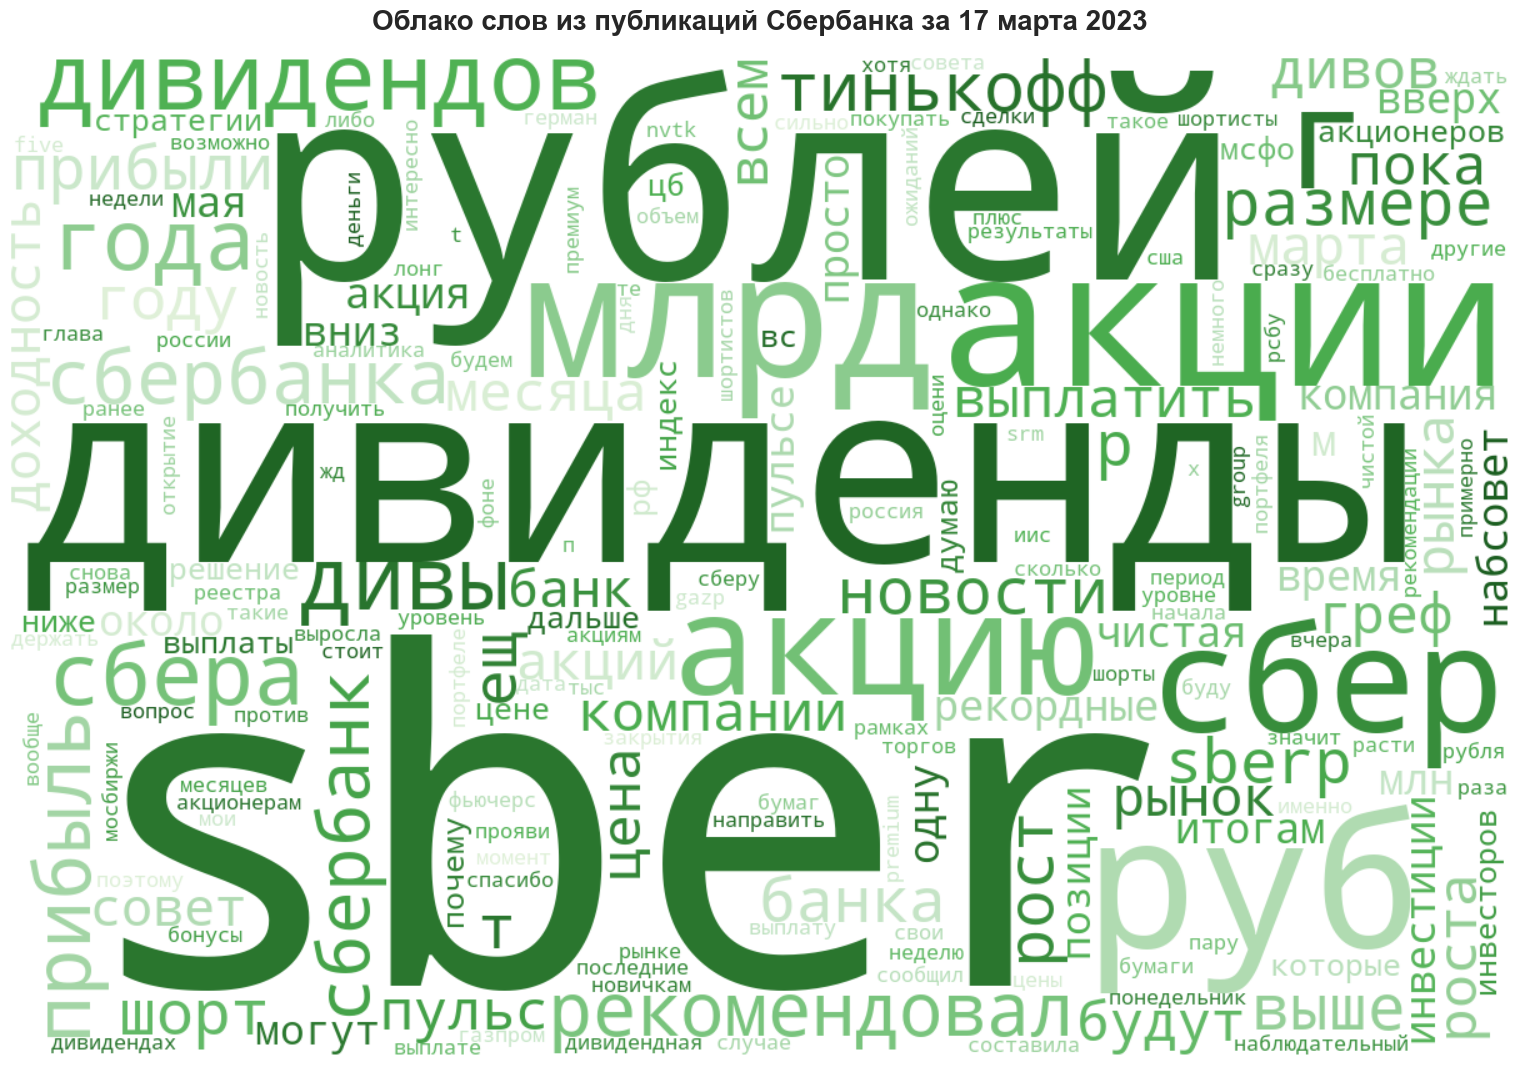

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.corpus import stopwords
from matplotlib.colors import LinearSegmentedColormap

# Получаем тексты публикаций
texts = sber_posts_2023[sber_posts_2023['date'] == '2023-03-17']['content'].values

# Объединяем все тексты в один документ
text = ' '.join(texts)

# Предобработка текста
def preprocess_text(text):
    # Приводим к нижнему регистру
    text = text.lower()
    
    # Удаляем URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Удаляем HTML-теги
    text = re.sub(r'<.*?>', '', text)
    
    # Удаляем специальные символы и цифры
    text = re.sub(r'[^а-яА-Яa-zA-Z\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    
    # Удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Применяем предобработку
cleaned_text = preprocess_text(text)

# Добавляем русские стоп-слова
try:
    russian_stopwords = set(stopwords.words('russian'))
except:
    russian_stopwords = set()

# Ручное добавление стоп-слов
custom_stopwords = {'это', 'который', 'весь', 'наш', 'свой', 'такой', 'очень', 'также',
                   'который', 'мочь', 'нужно', 'ещё', 'самый', 'можно', 'год', 'более',
                   'новый', 'например', 'только', 'быть', 'другой', 'каждый', 'сегодня', 
                   'ваш', 'день', 'нет', 'всё', 'для', 'когда', 'что', 'как', 'если', 'вам', 
                   'так', 'его', 'этот', 'они', 'она', 'оно', 'их', 'вас', 'там', 'тут',
                   'мы', 'вы', 'он', 'от', 'по', 'к', 'у', 'над', 'на', 'за', 'из', 'под', 'с', 'в'}

# Объединяем стандартные стоп-слова и кастомные
all_stopwords = russian_stopwords.union(custom_stopwords)

# Создаем свою цветовую карту, где самые важные слова будут насыщенного зеленого цвета
# От светло-зеленого к ярко-зеленому
sber_colors = ["#dff0d8",  # Очень светлый зеленый
              "#c8e6c9",  # Светлый зеленый
              "#a5d6a7",  # Зеленый
              "#81c784",  # Средний зеленый
              "#66bb6a",  # Выразительный зеленый
              "#4caf50",  # Насыщенный зеленый
              "#43a047",  # Насыщенный темный зеленый
              "#388e3c",  # Темно-зеленый
              "#2e7d32",  # Глубокий зеленый
              "#1b5e20"]  # Очень темный зеленый

# Создаем кастомную цветовую карту
sber_cmap = LinearSegmentedColormap.from_list("sber_greens", colors=sber_colors[::-1])  # Инвертируем порядок

# Создаем word cloud с новой цветовой картой
wordcloud = WordCloud(
    width=1200, 
    height=800,
    background_color='white',
    stopwords=all_stopwords,
    max_words=200,
    colormap=sber_cmap,  # Используем нашу кастомную карту
    collocations=False,  
    contour_width=1,
    contour_color='#1e8a2b',
    random_state=42,
    prefer_horizontal=0.9
).generate(cleaned_text)

# Создаем фигуру большого размера
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# Добавляем заголовок
plt.title('Облако слов из публикаций Сбербанка за 17 марта 2023', 
         fontsize=20, fontweight='bold', pad=20)

# Сохраняем в высоком разрешении
plt.savefig('sber_wordcloud_20230317.png', dpi=300, bbox_inches='tight')
plt.show()